## **Chess Analyzed**

The **goal** is to build a dashboard that displays win probabilities in chess based on a players opening mvoes.

How do I plan to do this? The data set used in this analysis consist of chess matches played between similarly skilled players. The details of each match have 3 key features: 

1. The openings moves made by each player
2. That pieces they used 
3. The overall probability of winning based on features 1 and 2 

With this information, I will run statistical analysis that arrive at two conclusions: which opening moves can a player make to better their chances of winning, and which moves should they avoid. 

My hopes are that this analysis can help beginner and amateur players improve their opening strategies.

**Data Exploration**

In [30]:
# Utility imports 
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Model imports
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [11]:
# load data
url = 'opening.csv'
df = pd.read_csv(url)
df.head().T

,0,1,2,3,4
opening_name,"Alekhine Defense, Balogh Variation","Alekhine Defense, Brooklyn Variation","Alekhine Defense, Exchange Variation","Alekhine Defense, Four Pawns Attack","Alekhine Defense, Four Pawns Attack, Fianchett..."
side,white,black,white,white,black
num_games,692,228,6485,881,259
ECO,B03,B02,B03,B03,B03
last_played_date,2018-06-22,2018-06-27,2018-07-06,2018-06-20,2018-05-20
perf_rating,2247,2145,2244,2187,2122
avg_player,2225,2193,2194,2130,2178
perc_player_win,40.8,29.8,40.8,39.7,37.8
perc_draw,24.3,22.4,27.7,23.2,21.2
pec_opponent_win,35,47.8,31.5,37.1,40.9


**Best move for black after d4 opening.**

In [12]:
# Creating a new data frame that only includes games where blacks first move was d4
d4 = df[df['move1w']=='d4'].groupby('move1b').agg({'num_games': np.sum, 'white_wins' : np.sum, 'black_wins':np.sum})

# A new column for the dataframe: players whites odds of winning
d4['white_odds'] = d4['white_wins'] / d4['black_wins']

# Sorting by player whites win rate
d4 = d4.sort_values('white_odds')

d4

,num_games,white_wins,black_wins,white_odds
move1b,,,,
d6,18321,6197.604,6241.726,0.992931
g6,23398,8776.983,8118.949,1.081049
e6,16035,6050.610,5044.462,1.199456
Nc6,1696,706.913,571.527,1.236885
Nf6,729601,275482.208,215293.989,1.279563
c5,18136,7616.886,5770.875,1.319884
f5,53855,22311.395,15690.109,1.422004
b5,1067,499.356,330.770,1.509677
e5,563,263.189,174.017,1.512433


C:\Users\14045\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='move1b', ylabel='white_odds'>

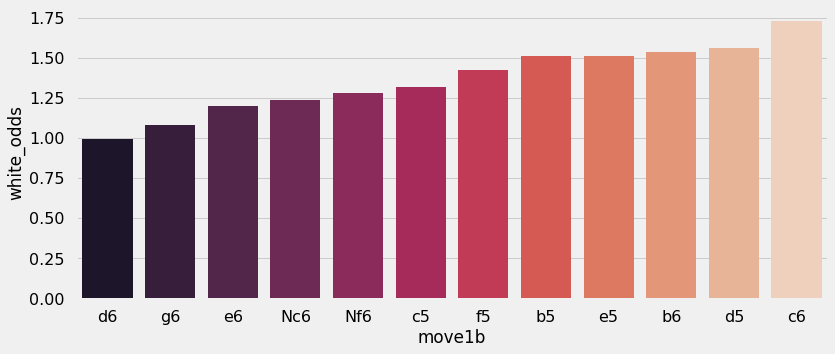

In [13]:
# Plotting the odds from the new dataframe 'd4'

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 5))
sns.barplot(d4.reset_index()['move1b'],d4.reset_index()['white_odds'] , palette='rocket')

**Most effective opening moves.**

In [14]:
w1 = df.groupby('move1w').agg({'num_games': np.sum, 'white_wins' : np.sum, 'black_wins':np.sum})
w1['white_odds'] = w1['white_wins'] / w1['black_wins'] 
res = w1.sort_values('white_odds', ascending = False)
res

,num_games,white_wins,black_wins,white_odds
move1w,,,,
g3,18777,7543.344,5322.527,1.417249
d4,1308961,504869.953,370723.505,1.361850
c4,259049,97642.317,73896.748,1.321334
Nf3,142996,53965.848,41511.309,1.300028
e4,1691765,650892.967,536512.247,1.213193
b3,16134,6051.112,5527.250,1.094778
00E+04,7040,2745.600,2640.000,1.040000
Nc3,4480,1659.026,1646.710,1.007479
a3,1308,466.956,506.196,0.922481


C:\Users\14045\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='move1w', ylabel='white_odds'>

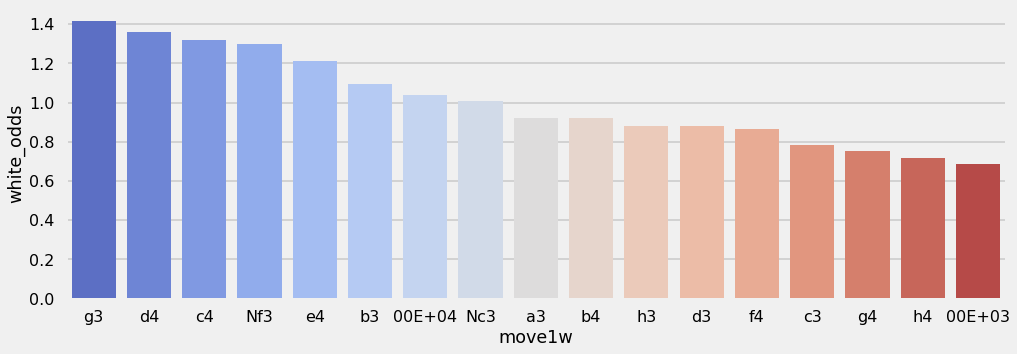

In [15]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(15, 5))
sns.barplot(res.reset_index()['move1w'],res.reset_index()['white_odds'] , palette='coolwarm')

**Analysis: based on a few features, predict player white wonn**
One hot encode? 
Feature slection importance? 

In [24]:
df = pd.read_csv(url, index_col='last_played_date', parse_dates=True)

# New Feature, the target: 
df['player_white_won'] = (df['white_wins'] > df['black_wins'])


# Columns dropped would cause leakage, have a high cardinality, or have no effect on the prediction.
df.drop(columns=['num_games','opening_name', 'ECO', 'perc_player_win',
                 'white_wins','black_wins', 'perc_white_win',
                'pec_opponent_win', 'white_odds', 'moves_list', 
                 'perc_black_win', 'white_odds', 'move4b', 'move4w'], inplace=True)

# Sorting the Index by date:
df = df.sort_values(by='last_played_date')
    
df.head()

,side,perf_rating,avg_player,perc_draw,move1w,move1b,move2w,move2b,move3w,move3b,player_white_won
last_played_date,,,,,,,,,,,
2010-04-10,white,2249,2243,25.5,e4,e5,Nf3,Nc6,Bc4,Bc5,False
2010-05-19,black,2214,2250,36.0,e4,e5,Bc4,Nf6,Nc3,Nxe4,True
2010-05-19,white,2184,2150,21.8,e4,e5,Bc4,Nf6,d4,exd4,True
2010-05-23,black,2286,2331,39.3,d4,f5,c4,Nf6,g3,e6,True
2010-05-25,black,2269,2281,26.1,e4,c5,Nf3,e6,d4,cxd4,False


In [25]:
# Splitting Data
target = 'player_white_won'
y = df[target]
X = df.drop(columns=target)

X_train, y_train = X['2018-06-18': '2018-07-09'], y['2018-06-18': '2018-07-09']
X_test, y_test = X['2018-04-23':'2018-06-17'], y['2018-04-23':'2018-06-17']
X_val, y_val = X['2010-04-10':'2018-04-22'], y['2010-04-10':'2018-04-22']

In [28]:
# Practice RFC Model
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100,
                           n_jobs=-1,
                           random_state=42)
)

model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['side', 'move1w', 'move1b', 'move2w',
                                      'move2b', 'move3w', 'move3b'],
                                mapping=[{'col': 'side',
                                          'data_type': dtype('O'),
                                          'mapping': black    1
white    2
NaN     -2
dtype: int64},
                                         {'col': 'move1w',
                                          'data_type': dtype('O'),
                                          'mapping': d4         1
e4         2
Nf3        3
c4         4
g3         5
g4         6
b3         7
a3         8
Nc3        9
b4        10
d3        11
f4        12
c3        13
00E+03    14
00E+04    15
NaN       -2
dtype: int64},
                                         {'col': 'move1b',
                                          'da...
Bc5      9
cxd4    10
Bb4     11
exd4    12
dxc4    13
a6      14
c5      15
NaN     

In [29]:
# Training and validation accuracy.

train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
print('Training Accuracy Score:', train_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.7663043478260869
